# Lab 1: Your first neural network

In this lab session we aim to accomplish the following:

- Set up a Colaboratory account for playing around with PyTorch interactively or run it locally on the lab machine.
- Show you the basics of PyTorch through the implementation of a multilayer perceptron/fully connected deep network.
- Introduce you to Tensorboard for visualising metrics throughout the training process.

First we will introduce you to PyTorch inside an interactive notebook (a Google hosted version of Jupyter notebooks or a local version), ideal for playing around and exploring the library. Next we will show you how to build a deep network and train it inside an interactive notebook. Finally, we will add logging of performance metrics to the code to enable you track the progress of training the network (this part only works on the lab machine).

### Contents
1. [Iris Flower Dataset - A 3-way classification problem](#Iris-Flower-Dataset)
2. [Interactive notebooks](#interactive-notebooks)
3. [Intro to PyTorch](#PyTorch-Intro)
4. [Your first DNN](#Building-Your-First-Fully-Connected-Network)
5. [Logging metrics with TensorBoard](#Logging-Performance-Metrics)
6. [Optional Extension: Implementing library functions](#Optional-Extension:-Implementing-library-functions)


In [1]:
import torch
torch.__version__

'2.6.0'

## Iris Flower Dataset

In 1936, British geneticist Ronald Fisher collected the Iris Flower Dataset [Wiki](https://en.wikipedia.org/wiki/Iris_flower_data_set)

It contains 150 samples of three types of Iris flowers. Each sample is described using four dimensions: the height and width of its sepals and petals. Follow the wikipedia link above to look at the Iris dataset file and understand the various dimensions.

The aim of this lab is to classify the Iris flow dataset, using a fully connected *deep* network. We will actually build a shallow one of 2 layers only, but the principles extend to any depth. 

--- 
## Interactive notebooks

### Running on Google Colaboratory

Head over to https://colab.research.google.com and sign in with a Google account.

You should see something similar to the image below:

<img src="./media/colaboratory.png" width="900">

Go to *File > New Python 3 Notebook*, it should prompt you to sign in with your google account.

---
## Running on the lab machine
Alternatively, you can run these notebooks on the lab machines locally. First, you will need to load anaconda by entering the following into a terminal: `module load anaconda`

Now, install tensorboard by entring the following into the terminal: `pip install tensorboard`

With this complete, run the jupyter notebook server by entering the following into the terminal: `jupyter notebook` and navigate to `http://localhost:8888` in your browser.

Go to *New > Notebook* to create a new notebook.

In the first cell type the following

```python
import torch
torch.__version__
```

and click the play button to the left of the cell to run the code (Alternatively, pressing `<Ctrl>-<Enter>` will also run the code).

<img src="./media/colaboratory-notebook.png" width="700">

You should get *at least* version `1.1.0`, more likely you will get `2.4.0`.

You can add new cells to the notebook by clicking the *+ Code* button in the toolbar.

--- 
## PyTorch Intro

In this section we will introduce you in a hands on way to PyTorch. Keep this notebook open alongside your interactive notebook and for each code cell in this notebook, you should write out the code in the interactive notebook, executing the code as you progress and ensuring you get the same output as listed below the relevant cell in this notebook.

PyTorch is a lot like numpy, it has a notion of an N-dimensional array like in numpy, but it is instead called a tensor. Tensors generalise scalar, vectors, and matrices. A scalar is a 0D tensor, a vector is a 1D tensor, and a matrix is a 2D tensor.

In [2]:
import torch
import numpy as np

array_np = np.array([[1, 2, 3],
                     [4, 5, 6]])
array_pytorch = torch.tensor([[1, 2, 3],
                              [4, 5, 6]])
print(array_np)
print(array_pytorch)

[[1 2 3]
 [4 5 6]]
tensor([[1, 2, 3],
        [4, 5, 6]])


Now we'll demonstrate some of the operations defined on tensors. Check out the docs for [`torch.Tensor`](https://pytorch.org/docs/stable/tensors.html) and [`torch`](https://pytorch.org/docs/stable/torch.html) for details. 

In [4]:
x = torch.tensor([1, 2, 3], dtype=torch.float32)
y = torch.tensor([4, 5, 6], dtype=torch.float32)
print(x, y)

tensor([1., 2., 3.]) tensor([4., 5., 6.])


In [5]:
x.shape  # what are the dimensions of the tensor?

torch.Size([3])

In [6]:
x.dim()  # how many dimensions does the tensor have?

1

In [7]:
x + y # + performs elementwise addition

tensor([5., 7., 9.])

In [6]:
x * y  # * performs elementwise multiplication 

tensor([ 4., 10., 18.])

In [7]:
x / y  # / performs elementwise division

tensor([0.2500, 0.4000, 0.5000])

In [8]:
torch.dot(x, y)  # compute the scalar product of two vectors

tensor(32.)

In [9]:
torch.dot(x, y).dim() # this is a 0D tensor or a scalar

0

In [10]:
# note how `torch.dot(x, y)` produces a scalar, yet this is still wrapped in a tensor
# to get the raw scalar value, call .item() on the tensor. This is so pytorch can 
# track the operations applied to even scalar values.
torch.dot(x, y).item()

32.0

In [11]:
x.mean()

tensor(2.)

In [12]:
x.std()

tensor(1.)

In [13]:
x.max()

tensor(3.)

In [14]:
x.argmax()  # the index of the maximum element of the tensor

tensor(2)

In [15]:
y = x = torch.arange(0, 9).reshape((3, 3))
x

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [16]:
x.shape

torch.Size([3, 3])

In [17]:
x.dim()

2

In [18]:
x @ y  # Matrix multiplication

tensor([[ 15,  18,  21],
        [ 42,  54,  66],
        [ 69,  90, 111]])

In [ ]:
x = torch.randn((2, 3, 1, 10, 10))
x.shape

tensor([[[[[ 2.4765e-01, -2.1315e-01,  4.9162e-01,  2.9023e-01, -1.1029e+00,
             6.7489e-01, -8.7387e-01,  3.2030e-01, -2.2861e+00,  1.3948e+00],
           [ 9.0200e-01, -1.2394e-01,  1.4000e+00, -4.0023e-01,  4.1171e-01,
             5.8625e-01, -8.5231e-01,  2.2718e+00,  1.6643e+00,  6.1561e-02],
           [-3.0391e-01, -2.2335e+00,  1.8146e-01,  4.6881e-01,  7.0524e-01,
             7.1532e-01, -3.1180e-01,  7.3560e-02, -1.2854e+00,  4.5928e-01],
           [ 5.0295e-01, -1.8511e+00, -1.3684e+00,  1.0124e+00, -1.6388e+00,
            -3.3911e-01, -1.8619e-01,  1.3207e-01,  9.0935e-01, -2.6240e+00],
           [-5.0538e-01, -9.1283e-01,  1.1412e+00,  4.8847e-01,  1.3041e+00,
            -1.6580e-01, -1.7400e-01,  6.2360e-01,  1.9146e-01, -6.0753e-01],
           [ 1.5042e+00, -4.8841e-01,  7.6542e-01,  1.3168e+00,  9.6269e-01,
             2.3562e-01, -1.1177e+00, -9.6870e-01, -2.2352e+00,  2.4902e+00],
           [ 5.5235e-01, -1.5728e+00,  1.7315e-01,  7.5789e-01, -6.781

In [20]:
x.squeeze().shape  # squeeze remove dimensions of size one.

torch.Size([2, 3, 10, 10])

In [21]:
x.unsqueeze(dim=4).shape  # unsqueeze adds a new dimension of size one at dimensional index `dim`.

torch.Size([2, 3, 1, 10, 1, 10])

In [22]:
x = torch.arange(0, 100).reshape((2, 5, 10))
x

tensor([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
         [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
         [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
         [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]],

        [[50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
         [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
         [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
         [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
         [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]])

In [23]:
x.reshape((10, 10))  # We can squash any number of dimensions into one using reshape

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
        [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
        [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
        [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [24]:
# Reshaping doesn't create new data, it produces a view on existing data,
# if you update that data, you'll update the old tensors it came from.

y = x.reshape((10, 10))
y[0, 0] = 100
print(y)
print(x)  # notice that the data in x has changed too!

tensor([[100,   1,   2,   3,   4,   5,   6,   7,   8,   9],
        [ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19],
        [ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29],
        [ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39],
        [ 40,  41,  42,  43,  44,  45,  46,  47,  48,  49],
        [ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59],
        [ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69],
        [ 70,  71,  72,  73,  74,  75,  76,  77,  78,  79],
        [ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89],
        [ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99]])
tensor([[[100,   1,   2,   3,   4,   5,   6,   7,   8,   9],
         [ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19],
         [ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29],
         [ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39],
         [ 40,  41,  42,  43,  44,  45,  46,  47,  48,  49]],

        [[ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59],
         [ 60,  61,  62,  63,  

We've really on scratched the surface of the functionality provided PyTorch. Before implementing something yourself, it's always worth scanning through the documentation to check if PyTorch already provides an implementation.

--- 
## Building Your First Fully Connected Network

Now you've got to know the basics of pytorch, we can implement a 2-layer fully connected network (a.k.a MultiLayer Percepton) and train it using gradient descent.

First we need to load in our data. We will use [scikit-learn](https://scikit-learn.org/stable/) for this as it bundles the iris dataset.

In [12]:
from sklearn import datasets
iris = datasets.load_iris()  # datasets are stored in a dictionary containing an array of features and targets
iris.keys()
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

The data is stored in a float64 numpy array with 150 rows of 4 columns. Each row is a data sample, in this case a flower, and each column is a feature of that data sample.

In [26]:
iris['data'].shape, iris['data'].dtype

((150, 4), dtype('float64'))

What do the first 15 examples look like? 

In [27]:
iris['data'][:15]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2]])

**Assessed Question:** What do each of the columns correspond to? 

In [28]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

The labels for the data are in a separate array called *target*.

How many classes do we have?

In [29]:
np.unique(iris['target'])

array([0, 1, 2])

What do the labels correspond to?

In [30]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Let's visualise the data to see what it looks like.

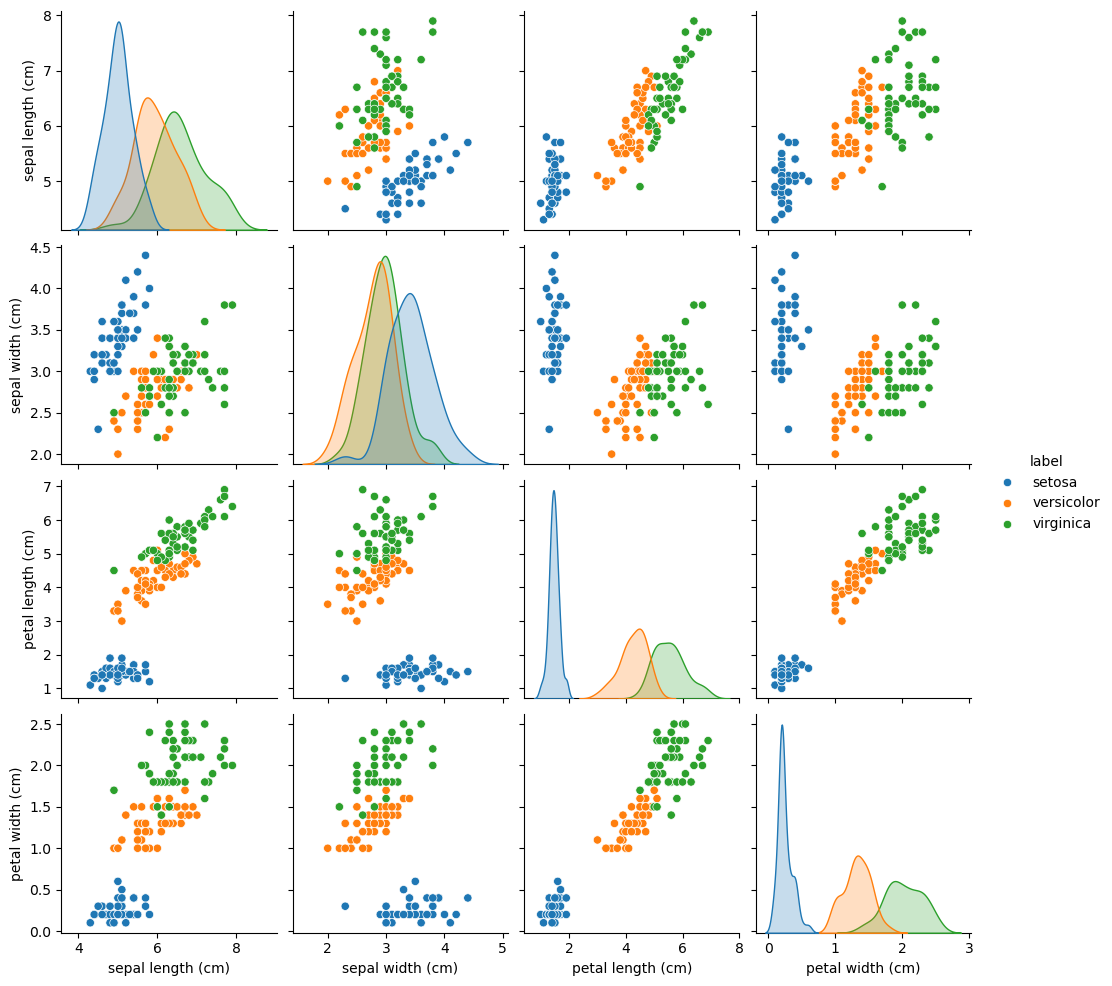

In [122]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

features_df = pd.DataFrame(
    iris['data'],
    columns=iris['feature_names']
)
features_df['label'] = iris['target_names'][iris['target']]
sns.pairplot(features_df, hue='label')
plt.show()

Typically we normalise features input to networks as this helps speed learning up as the loss landscape becomes easier to traverse (for more details see slides 11-13 in [lecture 6 of Geoff Hinton's course](https://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf)).

In [ ]:
preprocessed_features = (iris['data'] - iris['data'].mean(axis=0)) / iris['data'].std(axis=0)

iris['target']

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

Next we want to split this into a training and testing split.

**Assessed Question:** Why do we want to do this?

First we need to shuffle the data

**Assessed Question:** Why do we need to shuffle before splitting it? Hint: take a look at the entire dataset array.

In [14]:
from sklearn.model_selection import train_test_split

labels = iris['target']
# train_test_split takes care of the shuffling and splitting process
train_features, test_features, train_labels, test_labels = train_test_split(preprocessed_features, labels, test_size=1/3)

Finally, we need to take our numpy arrays and put them into tensors for processing by PyTorch.

In [15]:
features = {
    'train': torch.tensor(train_features, dtype=torch.float32),
    'test': torch.tensor(test_features, dtype=torch.float32),
}
labels = {
    'train': torch.tensor(train_labels, dtype=torch.long),
    'test': torch.tensor(test_labels, dtype=torch.long),
}

Now we need to create a fully connected layer that takes an input $x$, and trainable weights $W$ and biases $b$ and computes

$$Wx + b$$

PyTorch has a library of common layer types including a fully connected layer, its class name is `Linear` as the layer produces a linear transformation of the input data.

We have a single fully connected layer, but we want to stack these to produce a neural network composed of two layers (a.k.a Multi-layer Perceptron or MLP):

* Input size: 4 features
* Hidden layer size: 100 units
* Output size: 3 classes

We need to put a non-linear function in between these two layers as otherwise the transformation is just as powerful in representational capacity as a linear classifier. We want to produce non-linear decision boundaries as these will better fit our data.

Now we can define a MLP class that brings together 2 fully connected layers with a ReLU on the output of the first layer.

In [17]:
from torch import nn
from torch.nn import functional as F
from typing import Callable


class MLP(nn.Module):
    def __init__(self,
                 input_size: int,
                 hidden_layer_size: int,
                 output_size: int,
                 activation_fn: Callable[[torch.Tensor], torch.Tensor] = F.relu):
        super().__init__()
        self.l1 = nn.Linear(input_size, hidden_layer_size)
        self.l2 = nn.Linear(hidden_layer_size, output_size)
        self.activation_fn = activation_fn
        
    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        x = self.l1(inputs)
        x = self.activation_fn(x)
        x = self.l2(x)
        return x

Let's deconstruct the signature of the `forward` method

```python
def forward(self, inputs: torch.Tensor) -> torch.Tensor:
    ...
```

`inputs: torch.Tensor` says that the parameter `inputs` is of type `torch.Tensor`. The return type of the method is denoted by `-> torch.Tensor` stating that the method returns a tensor.

We use a generic type `Callable` which defines the type of a function, it has the format `Callable[[args], return_type]`. `activation_fn: Callable[[torch.Tensor], torch.Tensor]` means that `activation_fn` should be a function that takes in a single argument of type `torch.Tensor` and returns a `torch.Tensor`. We've also defined the default value of this parameter to be `F.relu` which is the functional implementation of a rectified linear unit in PyTorch.

Now we can instantiate the MLP class for our problem:

In [118]:
feature_count = 4
hidden_layer_size = 100
class_count = 3
model = MLP(feature_count, hidden_layer_size, class_count)

Our model produces a scalar value for each class for each example propagated through the network. We need to squash these values into a pseudo-probability distribution. We can do that with the softmax distribution $\mathrm{softmax} : \mathbb{R}^n \rightarrow [0, 1]^n$. It is defined as follows

$$\mathrm{softmax}(\mathbf{x})_i = \frac{e^{\mathbf{x}_i}}{\sum_j e^{\mathbf{x}_j}}$$

This definition results in the output vector summing to one: $$\sum_i\mathrm{softmax}(\mathbf{x})_i = 1$$

To train our network we need some way to measure the error between the output of the network $\mathbf{\hat{p}} : [0, 1]^C$ where $C$ is the number of classes and the label encoded into a one-hot representation $y: \{0, 1\}^C$. We measure the cross-entropy between them:

$$\mathrm{CE}(\mathbf{p}, y) = - \sum_c^C y_c \log(p_c)$$

We'll run a forward pass through the network to compute its predictions which we can then use to compute the loss function.

In [19]:
logits = model.forward(features['train'])
logits.shape

torch.Size([100, 3])

As you can see `logits` has a shape of (100,3). For each of the 100 data samples we have 3 outputs, one per class. A higher output value (relative to the other values for that data sample) indicates that the model is predicting that class as being more likely.

**Task:** Compute the loss of the `logits` against the training labels `labels['train']` using the [`nn.CrossEntropyLoss`](https://pytorch.org/docs/1.2.0/nn.html#torch.nn.CrossEntropyLoss) class which combines the softmax and cross entopy functions into a single operation. Save this in a variable called `loss`. 

Note that you will have to instantiate the class before you can call it on your logits and labels, like so:

In [20]:
loss_function = nn.CrossEntropyLoss()

Then you need to call `loss_function` with the `logits` and `labels['train']` to compute the loss

We can now compute the model parameters' gradients by calling `backward()` on the loss.

In [21]:
loss = loss_function(logits, labels['train'])
loss.backward()

The gradients will be computed and propagated back through the network.

We want to evaluate the quality of our networks predictions, accuracy is an informative metric for a classification task on a balanced dataset.

**Task:** Implement a function to compute accuracy with the following signature

```python
def accuracy(probs: torch.FloatTensor, targets: torch.LongTensor) -> float:
    """
    Args:
        probs: A float32 tensor of shape ``(batch_size, class_count)`` where each value 
            at index ``i`` in a row represents the score of class ``i``.
        targets: A long tensor of shape ``(batch_size,)`` containing the batch examples'
            labels.
    """
    ## First work out which class has been predicted for each data sample. Hint: use argmax
    ## Second count how many of these are correctly predicted
    ## Finally return the accuracy, i.e. the percentage of samples correctly predicted
```    

Your implementation should *not* use any `for` loops, instead you should use the operations defined on tensors like `argmax` and `sum`.

We've also provided some test cases below to verify the correctness of your implementation of `accuracy`.

In [96]:

def accuracy(probs: torch.FloatTensor, labels: torch.LongTensor):
    num_items = labels.size(dim=0)
    return (labels == probs.argmax(dim=1)).sum().item() / num_items
    
def check_accuracy(probs: torch.FloatTensor,
                   labels: torch.LongTensor,
                   expected_accuracy: float):
    actual_accuracy = float(accuracy(probs, labels))
    print(actual_accuracy)
    assert actual_accuracy == expected_accuracy, f"Expected accuracy to be {expected_accuracy} but was {actual_accuracy}"

check_accuracy(torch.tensor([[0, 1],
                             [0, 1],
                             [0, 1],
                             [0, 1],
                             [0, 1]]),
               torch.ones(5, dtype=torch.long),
               1.0)
check_accuracy(torch.tensor([[1, 0],
                             [0, 1],
                             [0, 1],
                             [0, 1],
                             [0, 1]]),
               torch.ones(5, dtype=torch.long),
               0.8)
check_accuracy(torch.tensor([[1, 0],
                             [1, 0],
                             [0, 1],
                             [0, 1],
                             [0, 1]]),
               torch.ones(5, dtype=torch.long),
               0.6)
check_accuracy(torch.tensor([[1, 0],
                             [1, 0],
                             [1, 0],
                             [1, 0],
                             [1, 0]]),
               torch.ones(5, dtype=torch.long),
               0.0)
print("All test cases passed")

1.0
0.8
0.6
0.0
All test cases passed


We have our network and a way of computing the error of its output with respect to labels. Now we just need something to optimize the network's weights. We can use stochastic gradient descent (SGD) for this purpose. It is a simple hill descending algorithm, taking a step in the steepest downhill direction (the negative of the gradient) in order to reduce the loss.

We now implement the training that optimizes the network's parameters over the dataset repeatedly. Each iteration through the dataset is known as an *epoch*. It is typical to train networks for anywhere between tens to thousands of epochs.

In [ ]:
from torch import optim


# Define the model to optimze
model = MLP(feature_count, hidden_layer_size, class_count)

# The optimizer we'll use to update the model parameters
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Now we define the loss function.
criterion = nn.CrossEntropyLoss() 

# Now we iterate over the dataset a number of times. Each iteration of the entire dataset 
# is called an epoch.
loss_vals_before = []
for epoch in range(0, 100):
    # We compute the forward pass of the network
    logits = model.forward(features['train'])
    # Then the value of loss function 
    loss = criterion(logits,  labels['train'])
    
    # How well the network does on the batch is an indication of how well training is 
    # progressing
    print("epoch: {} train accuracy: {:2.2f}, loss: {:5.5f}".format(
        epoch,
        accuracy(logits, labels['train']) * 100,
        loss.item()
    ))
    loss_vals_before.append(loss.item())
    
    # Now we compute the backward pass, which populates the `.grad` attributes of the parameters
    loss.backward()
    # Now we update the model parameters using those gradients
    optimizer.step()
    # Now we need to zero out the `.grad` buffers as otherwise on the next backward pass we'll add the 
    # new gradients to the old ones.
    optimizer.zero_grad()
    
# Finally we can test our model on the test set and get an unbiased estimate of its performance.    
logits = model.forward(features['test'])
test_accuracy = accuracy(logits, labels['test']) * 100
print("test accuracy: {:2.2f}".format(test_accuracy))

epoch: 0 train accuracy: 34.00, loss: 1.14247
epoch: 1 train accuracy: 80.00, loss: 0.93437
epoch: 2 train accuracy: 83.00, loss: 0.79963
epoch: 3 train accuracy: 83.00, loss: 0.71046
epoch: 4 train accuracy: 83.00, loss: 0.64782
epoch: 5 train accuracy: 83.00, loss: 0.60100
epoch: 6 train accuracy: 83.00, loss: 0.56413
epoch: 7 train accuracy: 84.00, loss: 0.53393
epoch: 8 train accuracy: 84.00, loss: 0.50846
epoch: 9 train accuracy: 86.00, loss: 0.48654
epoch: 10 train accuracy: 87.00, loss: 0.46735
epoch: 11 train accuracy: 87.00, loss: 0.45035
epoch: 12 train accuracy: 89.00, loss: 0.43513
epoch: 13 train accuracy: 90.00, loss: 0.42137
epoch: 14 train accuracy: 91.00, loss: 0.40886
epoch: 15 train accuracy: 91.00, loss: 0.39741
epoch: 16 train accuracy: 91.00, loss: 0.38687
epoch: 17 train accuracy: 91.00, loss: 0.37712
epoch: 18 train accuracy: 91.00, loss: 0.36807
epoch: 19 train accuracy: 91.00, loss: 0.35962
epoch: 20 train accuracy: 91.00, loss: 0.35170
epoch: 21 train accurac

**Task:** Try changing the learning rate `lr` passed in to the `optimizer` and see how this effects accuracy on the test set.

---
## Trying Different Optimisers

In this section you will explore using new optimisers and changing their parameters to see how they affect the training process.

To start with, although we have already used SGD, we have not utilised all of the paramters available to us. Specifically, we will look at momentum and weight decay. This will be covered in the lectures but as a brief recap -

Momentum helps the optimization process accelerate in the consistent direction of the gradient while dampening oscillations, hence making gradient descent smoother. It's like a ball rolling down a hill, gaining speed and smoothing out minor bumps, helping to escape shallow local minima and reach the global minimum faster.

Weight decay is a regularization technique that adds a penalty to the loss function proportional to the magnitude of the weights. This encourages the model to use smaller weights, which helps to prevent overfitting by making the model simpler and less sensitive to small changes in input data. However too high weight decay might lead to underfitting of the model. You can test the impact yourself.

### Momentum

Below is some code that uses a momentum value of 0.9 in the SGD optimiser

**Assessed Question:** . What do you notice about the affect this has on the training loss and train accuracy?

epoch: 0 train accuracy: 41.00, loss: 1.02503
epoch: 1 train accuracy: 73.00, loss: 0.91864
epoch: 2 train accuracy: 78.00, loss: 0.77268
epoch: 3 train accuracy: 77.00, loss: 0.65496
epoch: 4 train accuracy: 76.00, loss: 0.57745
epoch: 5 train accuracy: 78.00, loss: 0.52157
epoch: 6 train accuracy: 80.00, loss: 0.47461
epoch: 7 train accuracy: 81.00, loss: 0.43264
epoch: 8 train accuracy: 84.00, loss: 0.39554
epoch: 9 train accuracy: 87.00, loss: 0.36412
epoch: 10 train accuracy: 87.00, loss: 0.33881
epoch: 11 train accuracy: 87.00, loss: 0.31927
epoch: 12 train accuracy: 87.00, loss: 0.30451
epoch: 13 train accuracy: 88.00, loss: 0.29323
epoch: 14 train accuracy: 87.00, loss: 0.28412
epoch: 15 train accuracy: 86.00, loss: 0.27608
epoch: 16 train accuracy: 86.00, loss: 0.26827
epoch: 17 train accuracy: 86.00, loss: 0.26023
epoch: 18 train accuracy: 88.00, loss: 0.25184
epoch: 19 train accuracy: 88.00, loss: 0.24319
epoch: 20 train accuracy: 89.00, loss: 0.23449
epoch: 21 train accurac

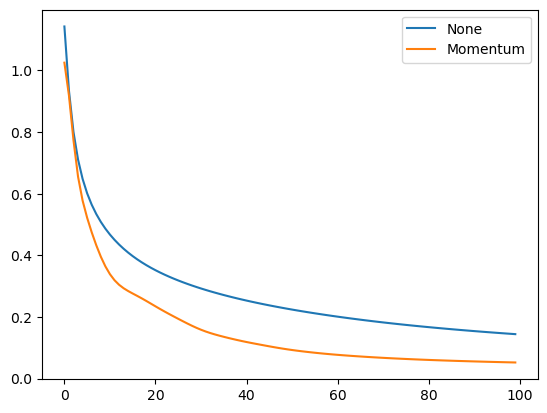

In [121]:
from torch import optim
import matplotlib.pyplot as plt


def train_n_test(lr=0.05, print_loss=True, momentum=0, weight_decay=0):
    # Define the model to optimze
    model = MLP(feature_count, hidden_layer_size, class_count)

    # The optimizer we'll use to update the model parameters
    optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=momentum, weight_decay=weight_decay)

    # Now we define the loss function.
    criterion = nn.CrossEntropyLoss() 

    # Now we iterate over the dataset a number of times. Each iteration of the entire dataset 
    # is called an epoch.
    loss_values = []
    for epoch in range(0, 100):
        # We compute the forward pass of the network
        logits = model.forward(features['train'])
        # Then the value of loss function 
        loss = criterion(logits,  labels['train'])
    
        # How well the network does on the batch is an indication of how well training is 
        # progressing
        if print_loss:
            print("epoch: {} train accuracy: {:2.2f}, loss: {:5.5f}".format(
                epoch,
                accuracy(logits, labels['train']) * 100,
                loss.item()
            ))
        loss_values.append(loss.item())
    
        # Now we compute the backward pass, which populates the `.grad` attributes of the parameters
        loss.backward()
        # Now we update the model parameters using those gradients
        optimizer.step()
        # Now we need to zero out the `.grad` buffers as otherwise on the next backward pass we'll add the 
        # new gradients to the old ones.
        optimizer.zero_grad()
    
    # Finally we can test our model on the test set and get an unbiased estimate of its performance.    
    logits = model.forward(features['test'])    
    test_accuracy = accuracy(logits, labels['test']) * 100
    print("test accuracy: {:2.2f}".format(test_accuracy))
    
    return loss_values

loss_values = train_n_test(lr=0.05, momentum=0.9)

plt.plot([i for i in range(len(loss_vals_before))], loss_vals_before, label="None")
plt.plot([i for i in range(len(loss_values))], loss_values, label="Momentum")
plt.legend()
plt.show()

### Weight Decay

Another parameter of the SGD optimiser is weight decay, which helps to prevent overfitting to the training data.

What do you think is the best way to investigate overfitting in models?

Write a function that will call the train_n_test function with different values of weight decay and then plot the loss curves together in one plot to see the effect of parameter.
What happens as you increase the weight decay?

**Assessed Question:** At what value does weight decay start to degrade performance?

epoch: 0 train accuracy: 32.00, loss: 1.14794
epoch: 1 train accuracy: 43.00, loss: 1.00517
epoch: 2 train accuracy: 66.00, loss: 0.81354
epoch: 3 train accuracy: 67.00, loss: 0.65534
epoch: 4 train accuracy: 69.00, loss: 0.54518
epoch: 5 train accuracy: 76.00, loss: 0.46912
epoch: 6 train accuracy: 78.00, loss: 0.41405
epoch: 7 train accuracy: 84.00, loss: 0.37223
epoch: 8 train accuracy: 87.00, loss: 0.33993
epoch: 9 train accuracy: 87.00, loss: 0.31532
epoch: 10 train accuracy: 89.00, loss: 0.29707
epoch: 11 train accuracy: 89.00, loss: 0.28373
epoch: 12 train accuracy: 88.00, loss: 0.27371
epoch: 13 train accuracy: 87.00, loss: 0.26548
epoch: 14 train accuracy: 87.00, loss: 0.25779
epoch: 15 train accuracy: 87.00, loss: 0.24980
epoch: 16 train accuracy: 88.00, loss: 0.24112
epoch: 17 train accuracy: 88.00, loss: 0.23177
epoch: 18 train accuracy: 88.00, loss: 0.22201
epoch: 19 train accuracy: 88.00, loss: 0.21216
epoch: 20 train accuracy: 90.00, loss: 0.20254
epoch: 21 train accurac

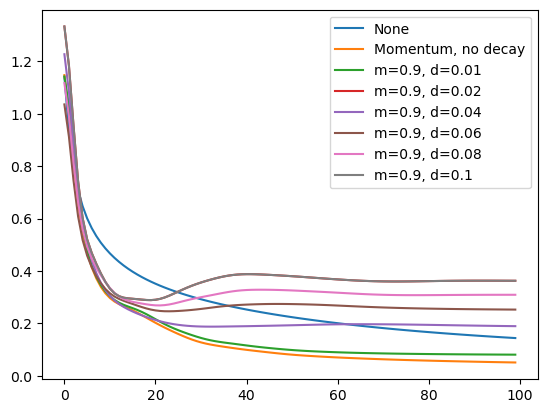

In [125]:
momentum_09 = train_n_test(lr=0.05, momentum=0.9)
decay_0_1 = train_n_test(lr=0.05, momentum=0.9, weight_decay=0.01)
decay_0_2 = train_n_test(lr=0.05, momentum=0.9, weight_decay=0.02)
decay_0_4 = train_n_test(lr=0.05, momentum=0.9, weight_decay=0.04)
decay_0_6 = train_n_test(lr=0.05, momentum=0.9, weight_decay=0.06)
decay_0_8 = train_n_test(lr=0.05, momentum=0.9, weight_decay=0.08)
decay_01 = train_n_test(lr=0.05, momentum=0.9, weight_decay=0.1)

plt.plot([i for i in range(len(loss_vals_before))], loss_vals_before, label="None")
plt.plot([i for i in range(len(momentum_09))], momentum_09, label="Momentum, no decay")
plt.plot([i for i in range(len(decay_0_1))], decay_0_1, label="m=0.9, d=0.01")
plt.plot([i for i in range(len(decay_01))], decay_01, label="m=0.9, d=0.02")
plt.plot([i for i in range(len(decay_0_4))], decay_0_4, label="m=0.9, d=0.04")
plt.plot([i for i in range(len(decay_0_6))], decay_0_6, label="m=0.9, d=0.06")
plt.plot([i for i in range(len(decay_0_8))], decay_0_8, label="m=0.9, d=0.08")
plt.plot([i for i in range(len(decay_01))], decay_01, label="m=0.9, d=0.1")
plt.legend()
plt.show()

### Adam Optimiser

Although SGD is a good optimiser, it is not the only one available to us (see the torch.optim page for more details). A popular choice is the Adam optimiser which uses adaptive learning rates for each parameter and includes bias correction, leading to faster convergence, greater stability, and generally requiring less manual tuning than SGD. It takes parameters such as beta = (beta1, beta2) and weight decay.

Using the code below, plot in three subplots the affect of changing the following Adam parameters:

1. beta1
2. weight_decay

**Assessed Question:** What is the effect of increasing beta1?

epoch: 0 train accuracy: 35.00, loss: 1.20992
epoch: 1 train accuracy: 79.00, loss: 0.53608
epoch: 2 train accuracy: 84.00, loss: 0.40098
epoch: 3 train accuracy: 78.00, loss: 0.49209
epoch: 4 train accuracy: 88.00, loss: 0.34025
epoch: 5 train accuracy: 85.00, loss: 0.30011
epoch: 6 train accuracy: 96.00, loss: 0.21127
epoch: 7 train accuracy: 94.00, loss: 0.17921
epoch: 8 train accuracy: 95.00, loss: 0.16118
epoch: 9 train accuracy: 91.00, loss: 0.21221
epoch: 10 train accuracy: 87.00, loss: 0.23825
epoch: 11 train accuracy: 85.00, loss: 0.34549
epoch: 12 train accuracy: 96.00, loss: 0.12701
epoch: 13 train accuracy: 98.00, loss: 0.10239
epoch: 14 train accuracy: 98.00, loss: 0.08798
epoch: 15 train accuracy: 98.00, loss: 0.07938
epoch: 16 train accuracy: 97.00, loss: 0.07334
epoch: 17 train accuracy: 98.00, loss: 0.06882
epoch: 18 train accuracy: 97.00, loss: 0.06536
epoch: 19 train accuracy: 98.00, loss: 0.06363
epoch: 20 train accuracy: 98.00, loss: 0.06276
epoch: 21 train accurac

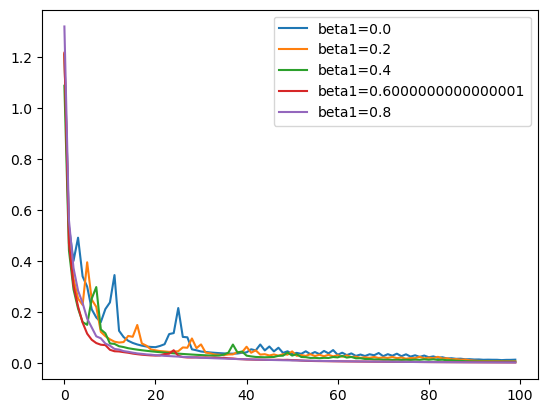

In [133]:
def train_n_test(lr=0.05, print_loss=True, betas=(0.9, 0.999), eps=1e-8, weight_decay=0):
    # Define the model to optimze
    model = MLP(feature_count, hidden_layer_size, class_count)

    # The optimizer we'll use to update the model parameters
    optimizer = optim.Adam(model.parameters(), lr=0.05, betas=betas, eps=eps, weight_decay=weight_decay)

    # Now we define the loss function.
    criterion = nn.CrossEntropyLoss() 

    # Now we iterate over the dataset a number of times. Each iteration of the entire dataset 
    # is called an epoch.
    loss_values = []
    for epoch in range(0, 100):
        # We compute the forward pass of the network
        logits = model.forward(features['train'])
        # Then the value of loss function 
        loss = criterion(logits,  labels['train'])
    
        # How well the network does on the batch is an indication of how well training is 
        # progressing
        if print_loss:
            print("epoch: {} train accuracy: {:2.2f}, loss: {:5.5f}".format(
                epoch,
                accuracy(logits, labels['train']) * 100,
                loss.item()
            ))
        loss_values.append(loss.item())
    
        # Now we compute the backward pass, which populates the `.grad` attributes of the parameters
        loss.backward()
        # Now we update the model parameters using those gradients
        optimizer.step()
        # Now we need to zero out the `.grad` buffers as otherwise on the next backward pass we'll add the 
        # new gradients to the old ones.
        optimizer.zero_grad()
    
    # Finally we can test our model on the test set and get an unbiased estimate of its performance.    
    logits = model.forward(features['test'])    
    test_accuracy = accuracy(logits, labels['test']) * 100
    print("test accuracy: {:2.2f}".format(test_accuracy))
    
    return loss_values

for i in range(5):
    beta1 = i * 0.2
    # for j in range(4):
    #     decay = (j+1) * 0.2
    loss = train_n_test(lr=0.05, betas=(beta1, 0.999))
    plt.plot([i for i in range(len(loss))], loss, label=f"beta1={beta1}")

plt.legend()
plt.show()

---

## Logging Performance Metrics

To monitor training, use Tensorboard, a real-time graphing tool to emerge from the TensorFlow project. With tensorboard you can log metrics in real time from a python script and visualise them in a web browser.

**NOTE: This part can only be done on the lab machine**

PyTorch has native support for tensorboard (as of 1.1.0). There are two parts to tensorboard
1. A `SummaryWriter`, this is an object you'll instantiate in your code, you can use it to log tensors, scalars, images, audio, and more. It will serialise and write these objects to disk into a log directory.
2. The `tensorboard` executable which launches a web server that provides an interface graphing the data that you have logged.

Let's log the training accuracy and loss.

First we need to import `SummaryWriter` and instantiate it.

```python
from torch.utils.tensorboard import SummaryWriter

summary_writer = SummaryWriter('logs', flush_secs=5)
```

Now **within the training loop**, log the scalar accuracy value and training loss:

```python
train_accuracy = accuracy(logits, labels['train']) * 100
summary_writer.add_scalar('accuracy/train', train_accuracy, epoch)
summary_writer.add_scalar('loss/train', loss.item(), epoch)
```

Close the writer **outside** the training loop

```python
summary_writer.close()
```

Now run your code again, you should have a `logs` directory in your working directory. This contains the values written by the summary writer. We can visualise these using `tensorboard`. 

Open a new terminal and navigate to the directory containing the `logs` directory.

Now, run the following commands 
```bash
module load anaconda
python3 -m tensorboard.main --logdir=/path/to/logs
```
on this terminal.


**Note** If you get an issue with `tensorboard: command not found`, 
```console
pip install tensorboard
```
to load it.

Now visit http://localhost:6006, you should see something similar to the screen below

![Tensorboard landing page](./media/tensorboard-landing-page.png)

The x-axis is the number of steps we've trained for.

By default tensorboard smoothes your data by computing a running average. You can adjust this smoothing using the slider in the left side bar. We'd recommend turning this off to begin with as the smoothing can be deceptive and hide issues with training.

**Congratulations.** 

You've trained your first NN model. This concludes the first lab. 

# END of Lab 1

If you would like to learn more, we offer additional extensions below.


---

# Optional Extension: Implementing library functions

Read on if you wish to open the black box and better understand how the library functions you used are implemented.

## Implementing ReLU 
We used the ReLU function as the non linearity in our network.

$$\mathrm{ReLU}(\mathbf{x}) = \max(\mathbf{x}, \mathbf{0})$$

How is this implemented?

First we compute a binary tensor indicating which elements are less than 0 by doing an element-wise comparison. We then use this as a mask to set those elements of the vector to 0.

In [92]:
def relu(inputs: torch.Tensor) -> torch.Tensor:
    # We take a copy of the input as otherwise we'll be modifying it in
    # place which makes it harder to debug.
    outputs = inputs.clone()  
    outputs[inputs < 0] = 0
    return outputs

**Task:** Test the `relu` function with a randomly generated tensor to check that all the values that are less than 0 are set to 0. Additionally, check that the input to the `relu` function wasn't modified (i.e. a new tensor was produced). This is a common implementation bug where you pass a tensor to a function expecting it to be idempotent, but it actually modifies its input. It is more memory efficient to compute ReLU in place but you have to be careful that you don't mind updating the tensor input to the function.

## Implementing Softmax and Cross entropy
We used the softmax function to squash our raw network outputs from the range $\mathbb{R}^n \rightarrow [0, 1]^n$. Implementing softmax is quite interesting as the naive implementation that is a direct translation of the equation suffers from numerical stability problems.

**Task:** Implement softmax and cross entropy exactly as they are defined below with the signatures `softmax(logits: torch.Tensor) -> torch.Tensor` and `cross_entropy(logits: torch.FloatTensor, labels: torch.LongTensor) -> torch.FloatTensor`


$$\mathrm{softmax}(\mathbf{x})_i = \frac{e^{\mathbf{x}_i}}{\sum_j e^{\mathbf{x}_j}}$$

$$\mathrm{CE}(\mathbf{p}, y) = - \sum_c^C y_c \log(p_c)$$

Replace the definition of `criterion` in the training loop with 
```python
criterion = lambda logits, ys: cross_entropy(softmax(logits), ys)
```

### Supplementary material

The following notebooks walk through *optional* material.

1. [Local Jupyter Lab setup](../misc/local-environment-setup.ipynb) - How to install Jupyter and set up your environment for exploring pytorch on your own machine.
2. [Autodifferentiation in pytorch](../misc/autograd-explanation.ipynb) - An explanation of how PyTorch performs auto differentiation.